
# Análise de Consumo Energético no Brasil
Este notebook realiza a análise de dados de consumo energético e populacional no Brasil, com base nos seguintes objetivos:

1. Calcular o consumo total de energia por estado e ano.
2. Calcular o consumo total de energia por região e ano.
3. Analisar o consumo per capita por estado e região.
4. Identificar os estados com maior e menor consumo total.

### Tecnologias Utilizadas
- **Pandas**: Manipulação e análise de dados.
- **Matplotlib**: Criação de gráficos.
- **Seaborn**: Visualizações estatísticas aprimoradas.

Os gráficos gerados neste notebook são úteis para identificar padrões de consumo e insights para políticas públicas e privadas.


In [2]:

# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db.connection import DBConnection  # Importa a classe de conexão com o banco de dados

print("Pacotes instalados com sucesso!")

Pacotes instalados com sucesso!


In [3]:
# Consultas SQL
consumo_query = """
SELECT 
    E.nm_estado, E.cd_estado, R.nm_regiao, C.cd_ano, C.vl_consumo
FROM 
    T_SEM_CONSUMO_ENERGIA C
JOIN 
    T_SEM_ESTADO E ON C.cd_estado = E.cd_estado
JOIN 
    T_SEM_REGIAO R ON E.cd_regiao = R.cd_regiao
"""

populacao_query = """
SELECT 
    P.cd_estado, P.cd_ano, P.vl_populacao
FROM 
    T_SEM_POPULACAO P
JOIN 
    T_SEM_ESTADO E ON P.cd_estado = E.cd_estado
"""

# Executar consultas usando o gerenciador de contexto da classe DBConnection
try:
    with DBConnection() as connection:
        # Consultar os dados de consumo energético
        cursor = connection.cursor()
        cursor.execute(consumo_query)
        consumo_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

        # Consultar os dados de população
        cursor.execute(populacao_query)
        populacao_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

    print("Dados carregados com sucesso a partir do banco de dados Oracle!")
except Exception as e:
    print("Erro ao executar as consultas:", e)


# Verificar os dados carregados
print("Dados de Consumo Energético:")
print(consumo_data.head())

print("\nDados de População:")
print(populacao_data.head())

Dados carregados com sucesso a partir do banco de dados Oracle!
Dados de Consumo Energético:
        NM_ESTADO  CD_ESTADO NM_REGIAO  CD_ANO  VL_CONSUMO
0           Bahia         29  Nordeste    2005  1520260.39
1    Minas Gerais         31   Sudeste    2005  3843654.16
2  Espírito Santo         32   Sudeste    2005   652504.30
3  Rio de Janeiro         33   Sudeste    2005  2637308.45
4       São Paulo         35   Sudeste    2005  8941381.64

Dados de População:
   CD_ESTADO  CD_ANO  VL_POPULACAO
0         11    2004     1562085.0
1         11    2005     1534594.0
2         11    2006     1562417.0
3         11    2007     1527991.0
4         11    2008     1493565.0


In [4]:
# Uniformizar os nomes das colunas em ambos os DataFrames
consumo_data.columns = consumo_data.columns.str.lower()
populacao_data.columns = populacao_data.columns.str.lower()

# Unir os dados de consumo e população
# A união é feita com base no estado (cd_estado) e ano (cd_ano)
merged_data = pd.merge(consumo_data, populacao_data, on=["cd_estado", "cd_ano"])

# Adicionar colunas calculadas, como consumo per capita
merged_data["consumo_per_capita"] = merged_data["vl_consumo"] / merged_data["vl_populacao"]

# Visualizar as primeiras linhas do dataframe combinado
merged_data.head()


,nm_estado,cd_estado,nm_regiao,cd_ano,vl_consumo,vl_populacao,consumo_per_capita
0,Bahia,29,Nordeste,2005,1520260.39,13815334.0,0.110042
1,Minas Gerais,31,Sudeste,2005,3843654.16,19237450.0,0.199801
2,Espírito Santo,32,Sudeste,2005,652504.30,3408365.0,0.191442
3,Rio de Janeiro,33,Sudeste,2005,2637308.45,15383407.0,0.171439
4,São Paulo,35,Sudeste,2005,8941381.64,40442795.0,0.221087



## Gráfico 1: Consumo Total por Estado e Ano

Este gráfico exibe o consumo total de energia para cada estado ao longo dos anos. Ele ajuda a identificar:
- Estados com maior consumo total.
- Tendências no consumo ao longo do tempo.


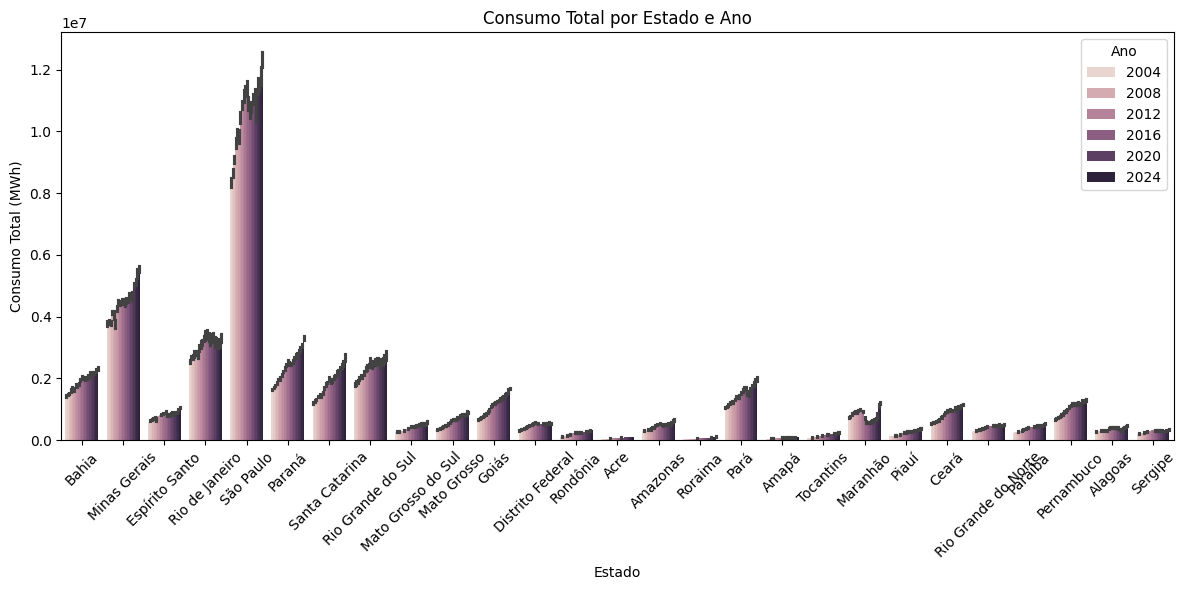

In [5]:

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x="nm_estado", y="vl_consumo", hue="cd_ano")
plt.title("Consumo Total por Estado e Ano")
plt.xlabel("Estado")
plt.ylabel("Consumo Total (MWh)")
plt.xticks(rotation=45)
plt.legend(title="Ano")
plt.tight_layout()
plt.show()



### Conclusão do Gráfico 1

Os estados com maior consumo total destacam-se ao longo dos anos. Tendências específicas, como crescimento ou queda, ajudam a planejar políticas regionais de eficiência energética.



## Gráfico 2: Consumo Total por Região e Ano

Este gráfico analisa o consumo total de energia por região ao longo dos anos. Ele destaca:
- A diferença de consumo entre as regiões.
- Regiões com maior demanda energética.


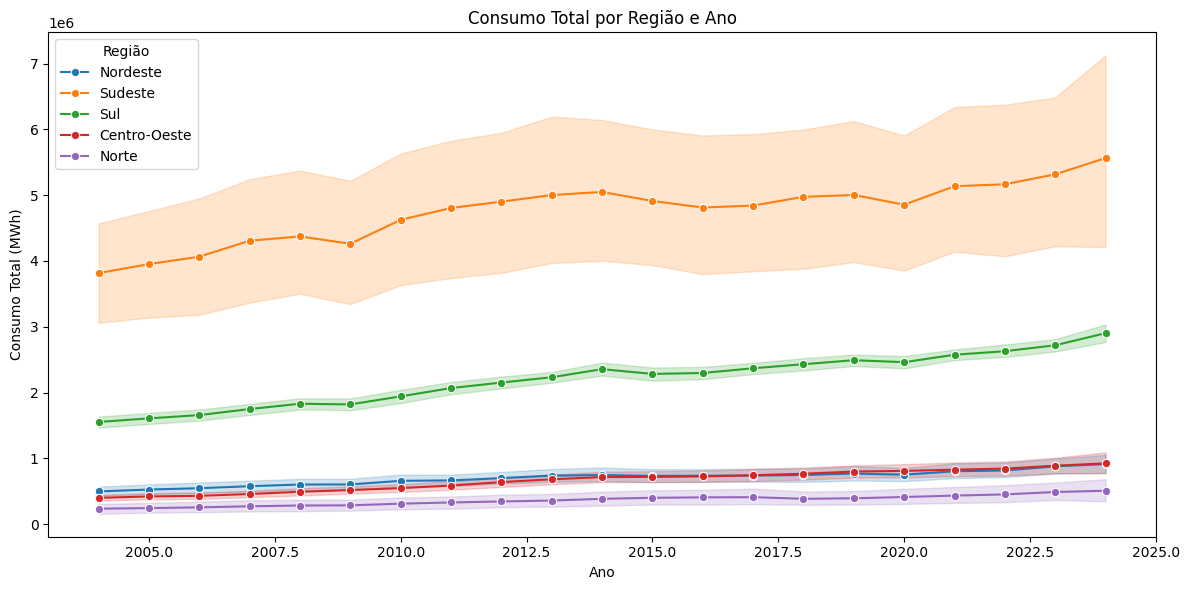

In [6]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x="cd_ano", y="vl_consumo", hue="nm_regiao", marker="o")
plt.title("Consumo Total por Região e Ano")
plt.xlabel("Ano")
plt.ylabel("Consumo Total (MWh)")
plt.legend(title="Região")
plt.tight_layout()
plt.show()



### Conclusão do Gráfico 2

As regiões Sudeste e Nordeste se destacam pelo alto consumo energético, refletindo maior densidade populacional e atividade econômica.



## Gráfico 3: Consumo Per Capita por Estado

Este gráfico exibe o consumo de energia per capita para cada estado. Ele ajuda a:
- Identificar estados com maior eficiência ou desperdício energético.
- Planejar políticas personalizadas.


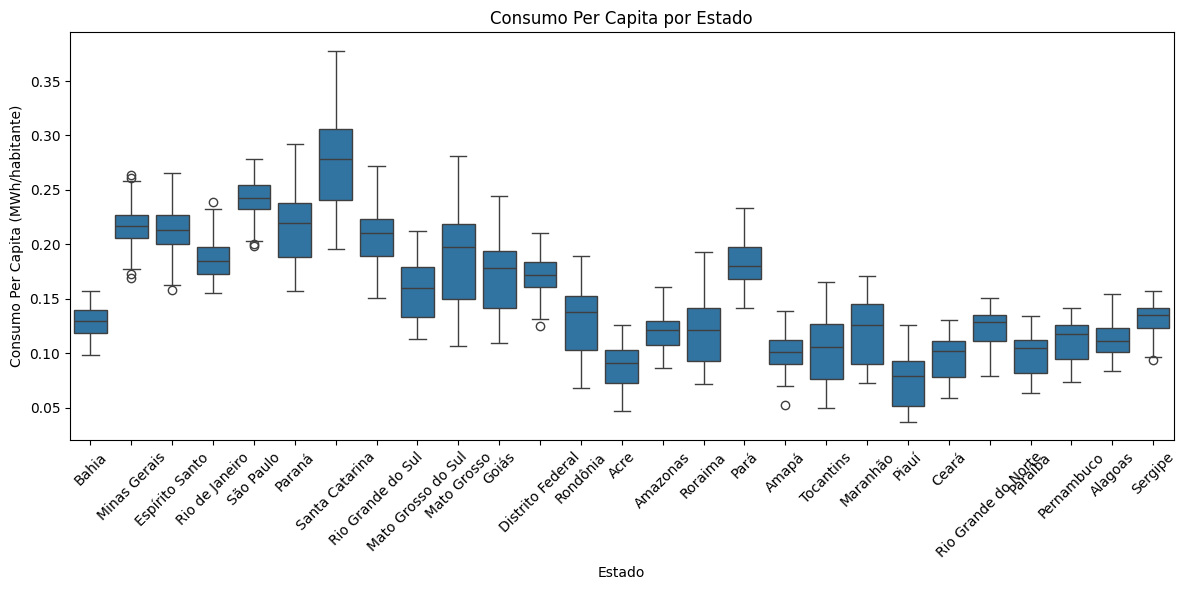

In [7]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x="nm_estado", y="consumo_per_capita")
plt.title("Consumo Per Capita por Estado")
plt.xlabel("Estado")
plt.ylabel("Consumo Per Capita (MWh/habitante)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Conclusão do Gráfico 3

Estados com maior consumo per capita podem ser alvo de políticas para reduzir desperdícios e incentivar eficiência energética.



## Gráfico 4: Consumo Per Capita por Região

Este gráfico compara o consumo de energia per capita entre as regiões. Ele evidencia:
- Regiões mais dependentes de energia.
- Possíveis desigualdades no acesso ou uso da energia.


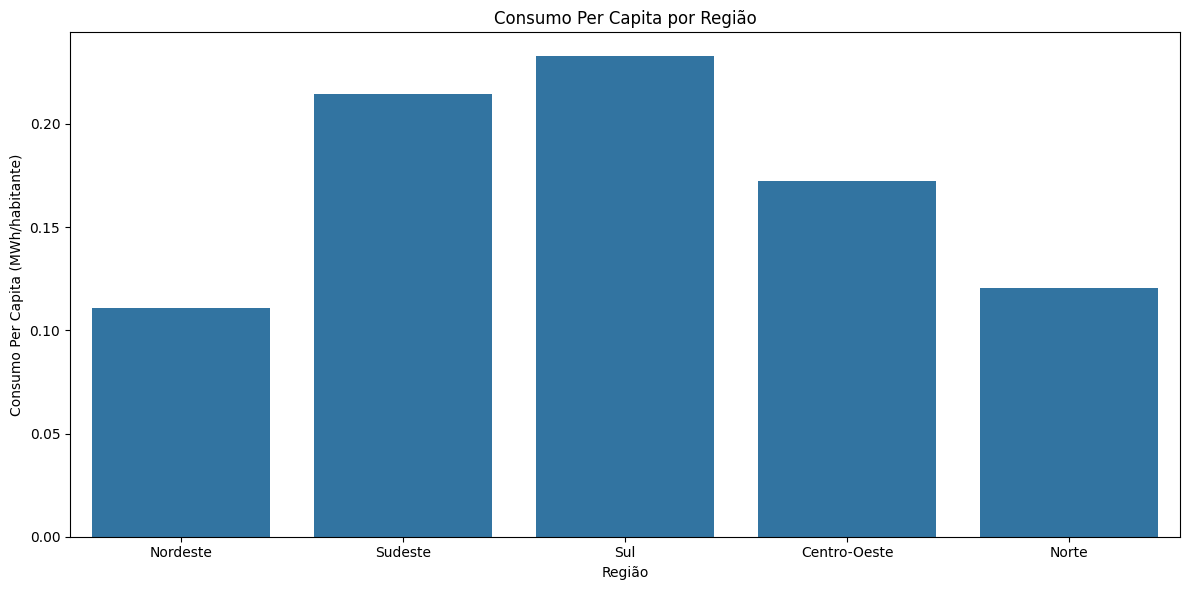

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x="nm_regiao", y="consumo_per_capita", errorbar=None)
plt.title("Consumo Per Capita por Região")
plt.xlabel("Região")
plt.ylabel("Consumo Per Capita (MWh/habitante)")
plt.tight_layout()
plt.show()



### Conclusão do Gráfico 4

Regiões com maior consumo per capita indicam alta demanda energética, enquanto as de menor consumo podem refletir acesso limitado à energia.
